## Stock Market Analysis of Tech Companies
Nhi Phung

## 1. Setup and Data Loading

Import required libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Set plot style

In [9]:
plt.style.use('seaborn')

Define helper functions for file paths:

In [11]:
def get_stock_file_path(company):
    base_path = r"C:\Users\tunhi\Downloads\S&P_resources\individual_stocks_5yr"
    return f"{base_path}\{company}_data.csv"

In [12]:
#Load the stock data:
def load_stock_data():
    try:
        company_list = [
            get_stock_file_path('AAPL'),
            get_stock_file_path('AMZN'),
            get_stock_file_path('GOOG'),
            get_stock_file_path('MSFT')
        ]
        
        all_data = pd.DataFrame()
        
        for file in company_list:
            try:
                print(f"Loading file: {file}")
                current_df = pd.read_csv(file)
                current_df['Name'] = file.split('\\')[-1].split('_')[0]
                all_data = pd.concat([all_data, current_df], ignore_index=True)
            except Exception as e:
                print(f"Error loading {file}: {e}")
        
        return all_data
    except Exception as e:
        print(f"Error in load_stock_data: {e}")
        return pd.DataFrame()

Load the data

In [14]:
all_data = load_stock_data()

Loading file: C:\Users\tunhi\Downloads\S&P_resources\individual_stocks_5yr\AAPL_data.csv
Loading file: C:\Users\tunhi\Downloads\S&P_resources\individual_stocks_5yr\AMZN_data.csv
Loading file: C:\Users\tunhi\Downloads\S&P_resources\individual_stocks_5yr\GOOG_data.csv
Loading file: C:\Users\tunhi\Downloads\S&P_resources\individual_stocks_5yr\MSFT_data.csv


Display first few rows

In [16]:
print("\nFirst few rows of the data:")
display(all_data.head())


First few rows of the data:


,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


Display basic information about the dataset

In [18]:
print("\nDataset Info:")
display(all_data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4752 non-null   object 
 1   open    4752 non-null   float64
 2   high    4752 non-null   float64
 3   low     4752 non-null   float64
 4   close   4752 non-null   float64
 5   volume  4752 non-null   int64  
 6   Name    4752 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 260.0+ KB


None

## 2. Stock Price Analysis Over Time

Analyze how stock prices have changed over the observation period.

In [20]:
def analyze_price_changes(all_data):
    try:
        print("Analyzing price changes...")
        all_data['date'] = pd.to_datetime(all_data['date'])
        
        plt.figure(figsize=(20,12))
        tech_list = all_data['Name'].unique()
        
        for index, company in enumerate(tech_list, 1):
            plt.subplot(2, 2, index)
            data = all_data[all_data['Name'] == company]
            plt.plot(data['date'], data['close'])
            plt.title(f"{company} Stock Price")
            plt.xlabel('Date')
            plt.ylabel('Price ($)')
            plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error in analyze_price_changes: {e}")

Analyze price changes

Analyzing price changes...


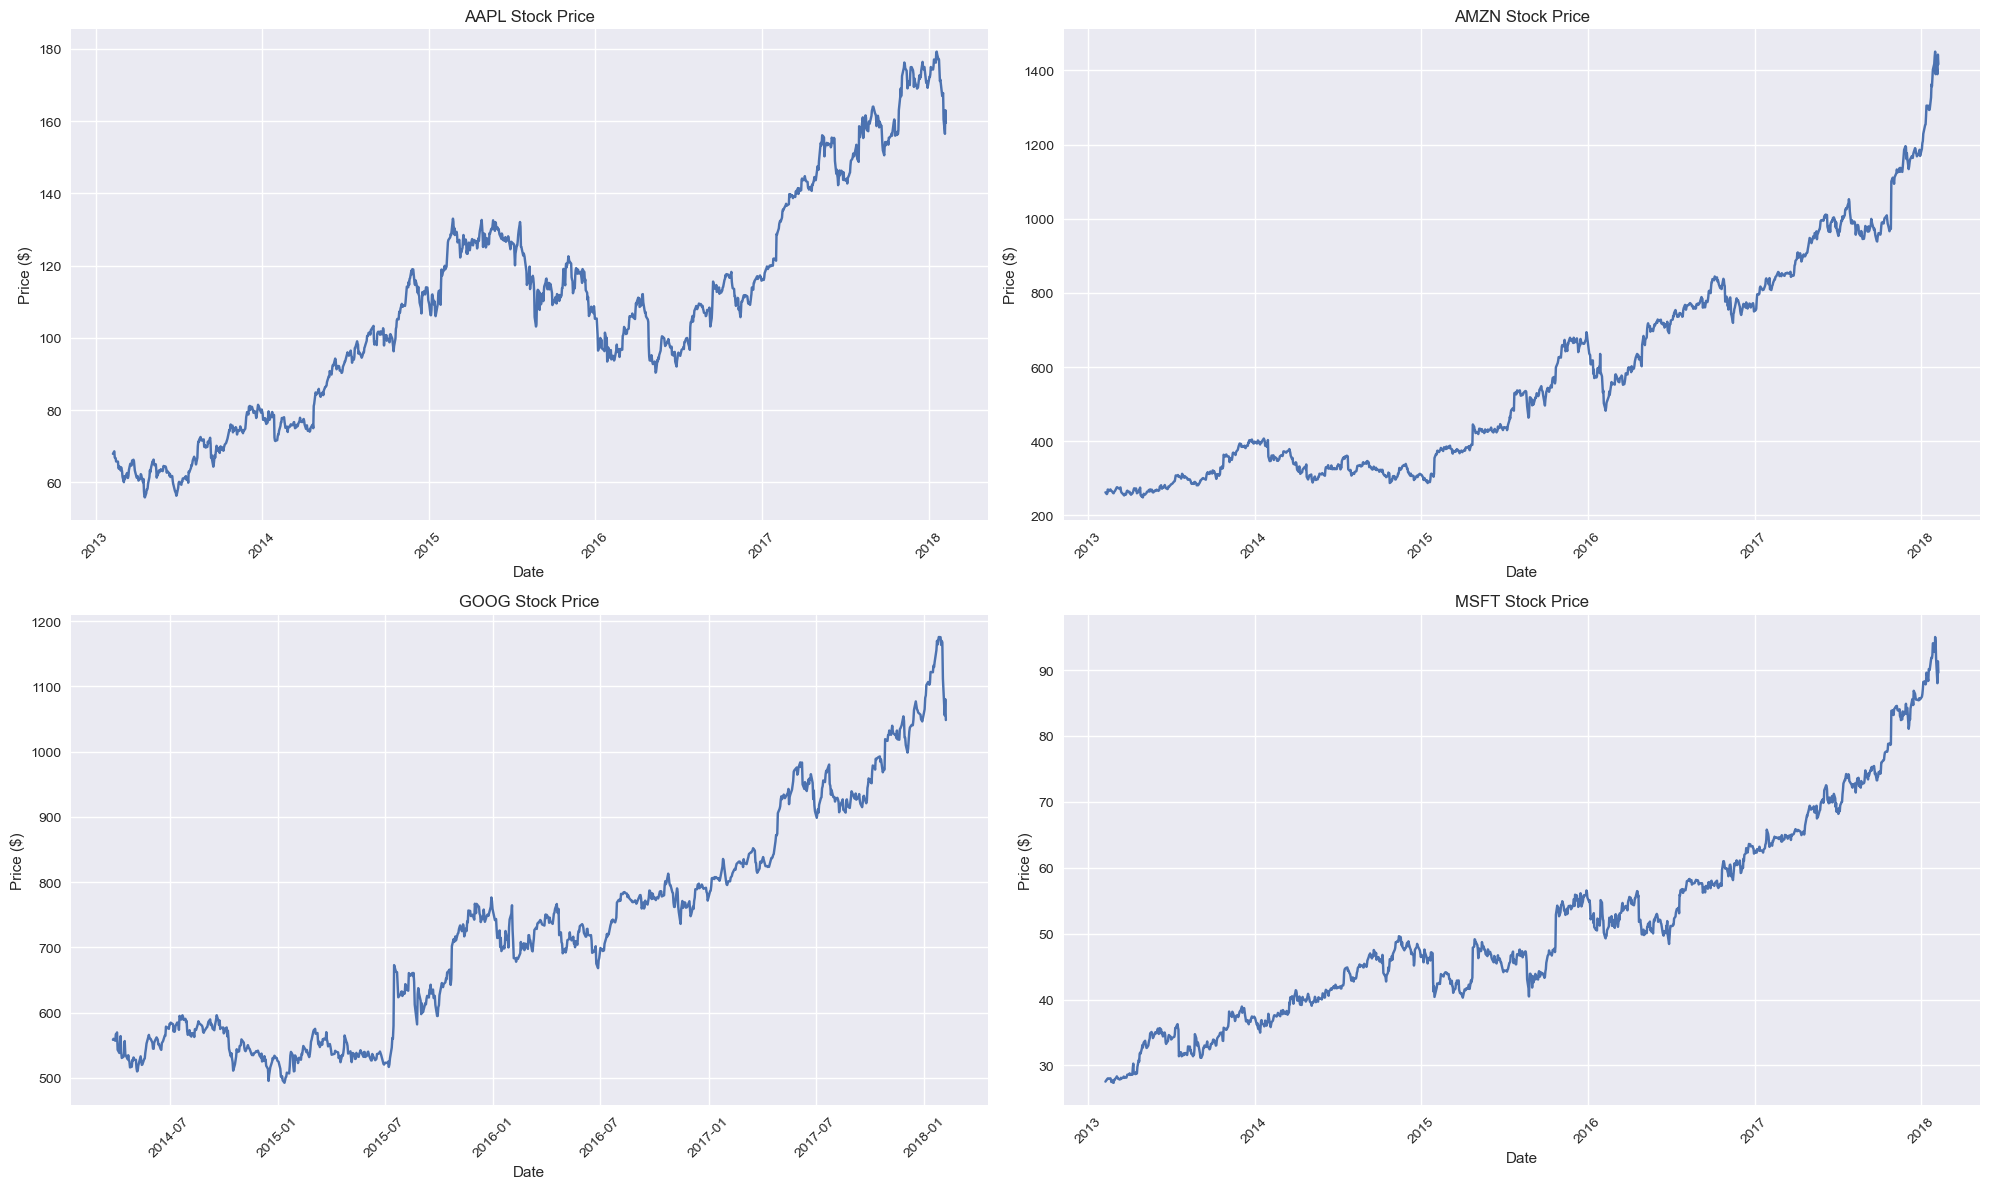

In [22]:
analyze_price_changes(all_data)

## 3. Moving Average Analysis

Calculate and visualize moving averages to understand trends.

In [31]:
def calculate_moving_averages(all_data):
    try:
        print("Calculating moving averages...")
        new_data = all_data.copy()
        ma_days = [10, 20, 50]
        
        for ma in ma_days:
            new_data[f'close_{ma}'] = new_data.groupby('Name')['close'].transform(
                lambda x: x.rolling(window=ma).mean()
            )
        
        return new_data
    except Exception as e:
        print(f"Error in calculate_moving_averages: {e}")
        return all_data.copy()

In [32]:
def plot_moving_averages(new_data):
    try:
        print("Plotting moving averages...")
        new_data = new_data.copy()
        new_data['date'] = pd.to_datetime(new_data['date'])
        new_data.set_index('date', inplace=True)
        tech_list = new_data['Name'].unique()
        
        plt.figure(figsize=(20,12))
        for index, company in enumerate(tech_list, 1):
            plt.subplot(2, 2, index)
            data = new_data[new_data['Name'] == company]
            data[['close_10', 'close_20', 'close_50']].plot(ax=plt.gca())
            plt.title(f"{company} Moving Averages")
            plt.xlabel('Date')
            plt.ylabel('Price ($)')
            plt.legend(['10 Day MA', '20 Day MA', '50 Day MA'])
        
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error in plot_moving_averages: {e}")

Calculate and plot moving averages

Calculating moving averages...
Plotting moving averages...


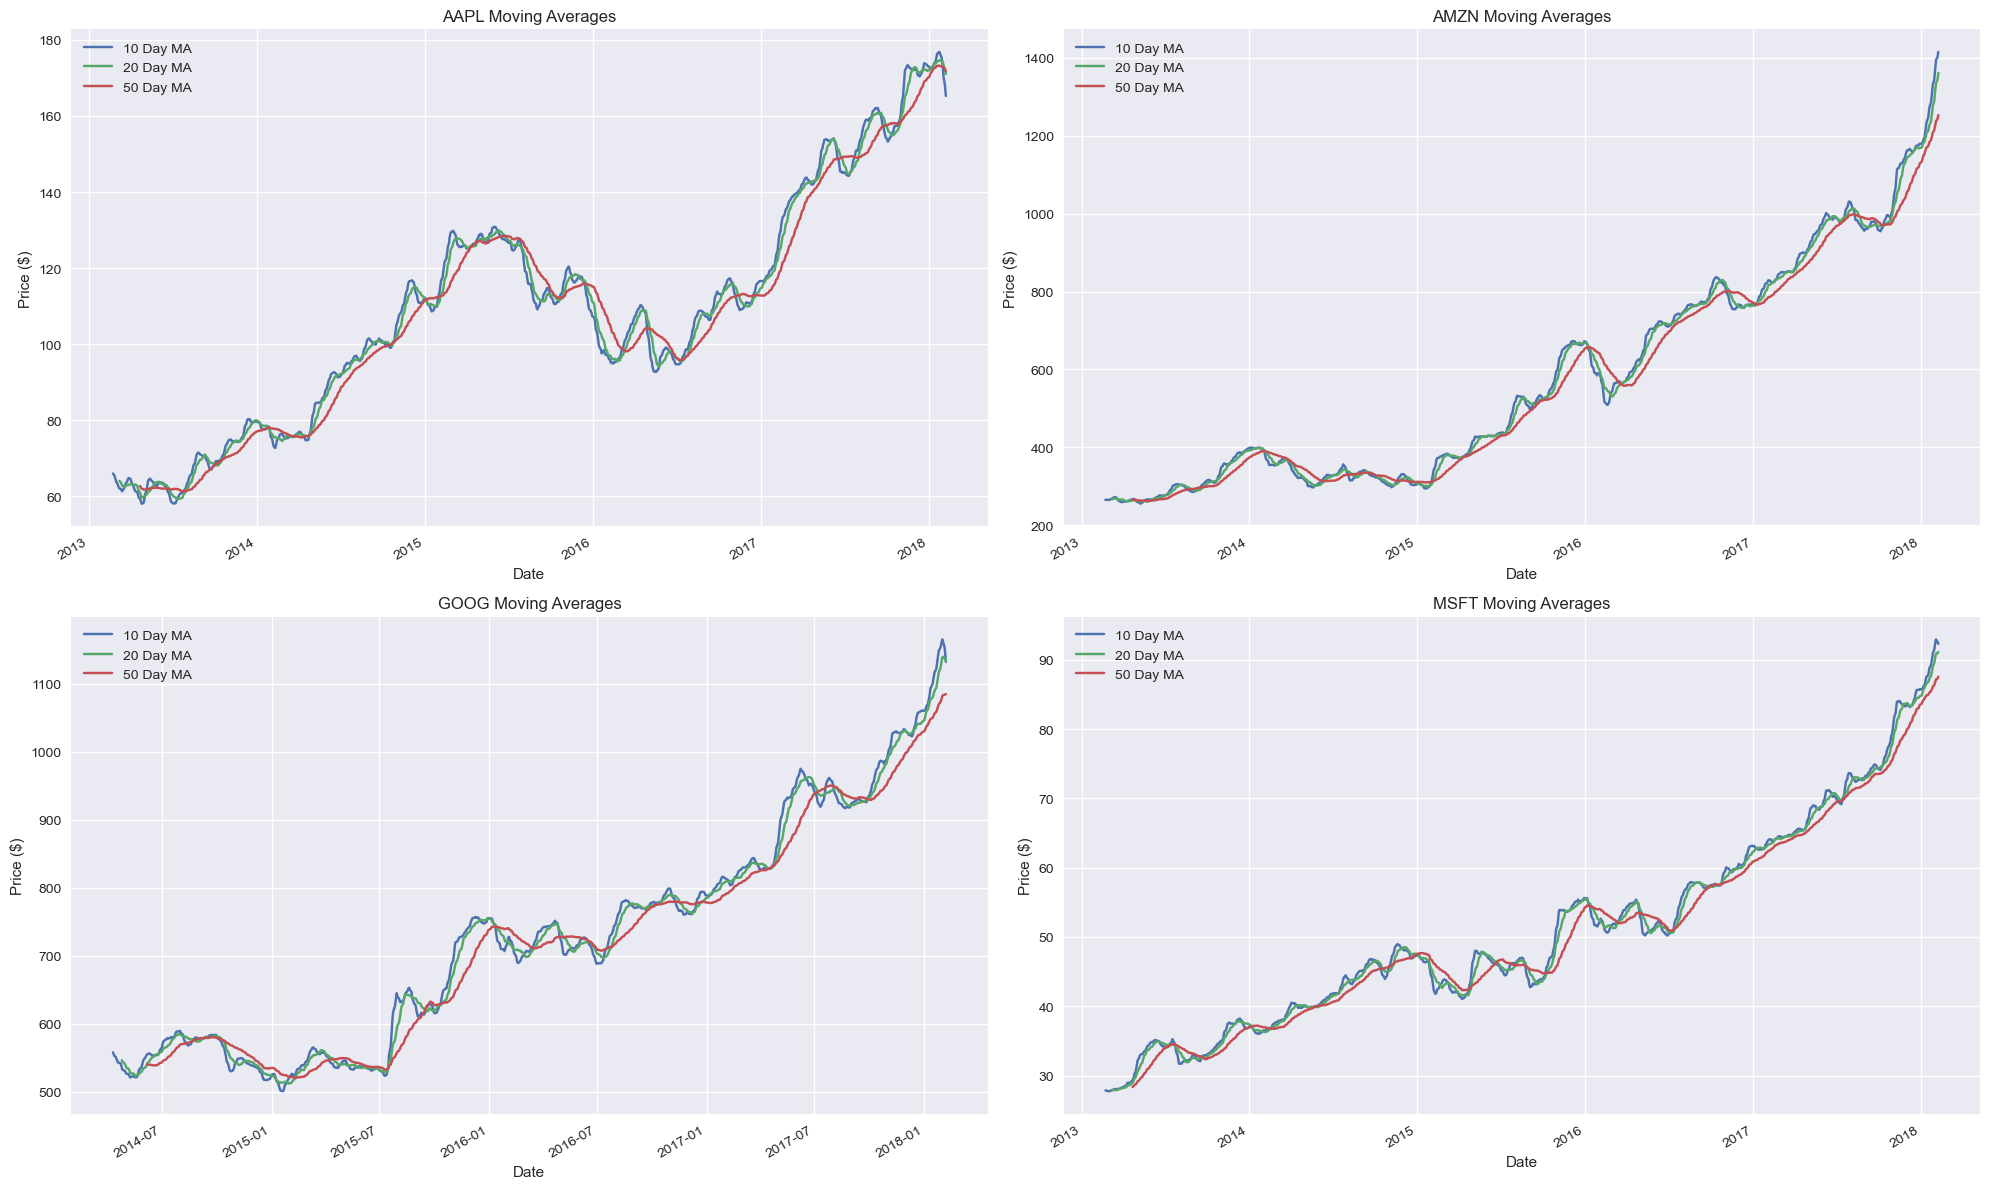

In [27]:
new_data = calculate_moving_averages(all_data)
plot_moving_averages(new_data)

## 4. Daily Returns Analysis

Analyze daily returns for Apple stock

Analyzing Apple daily returns...


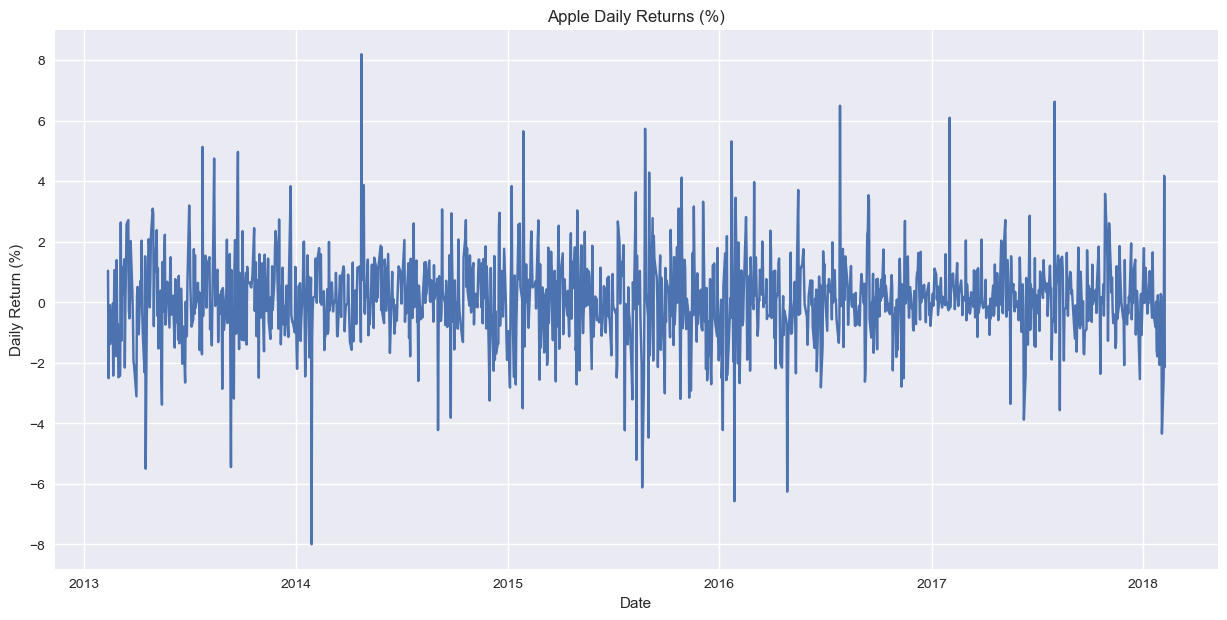


Summary Statistics for Daily Returns:
count    1258.000000
mean        0.078620
std         1.459301
min        -7.992722
25%        -0.639654
50%         0.043470
75%         0.863101
max         8.198180
Name: Daily_return, dtype: float64


In [43]:
def analyze_daily_returns():
    try:
        print("Analyzing Apple daily returns...")
        apple = pd.read_csv(get_stock_file_path('AAPL'))
        apple['date'] = pd.to_datetime(apple['date'])
        apple['Daily_return'] = apple['close'].pct_change() * 100
        
        plt.figure(figsize=(15, 7))
        plt.plot(apple['date'], apple['Daily_return'])
        plt.title('Apple Daily Returns (%)')
        plt.xlabel('Date')
        plt.ylabel('Daily Return (%)')
        plt.grid(True)
        plt.show()
        
        # Display summary statistics
        print("\nSummary Statistics for Daily Returns:")
        print(apple['Daily_return'].describe())
        
        return apple
    except Exception as e:
        print(f"Error in analyze_daily_returns: {e}")
        return pd.DataFrame()

# Call the function
apple_data = analyze_daily_returns()

Analyze daily returns

Analyzing Apple daily returns...


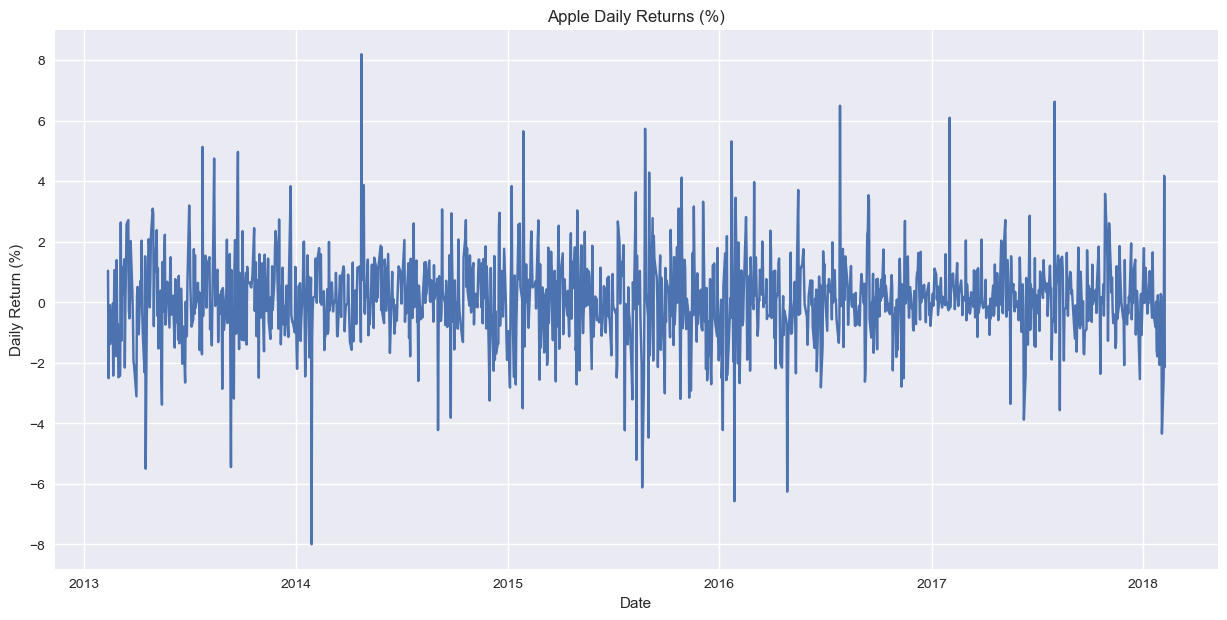


Summary Statistics for Daily Returns:
count    1258.000000
mean        0.078620
std         1.459301
min        -7.992722
25%        -0.639654
50%         0.043470
75%         0.863101
max         8.198180
Name: Daily_return, dtype: float64


In [44]:
apple_returns = analyze_daily_returns()

## 5. Correlation Analysis

Analyze correlations between different stock prices.

Analyzing correlations between stocks...


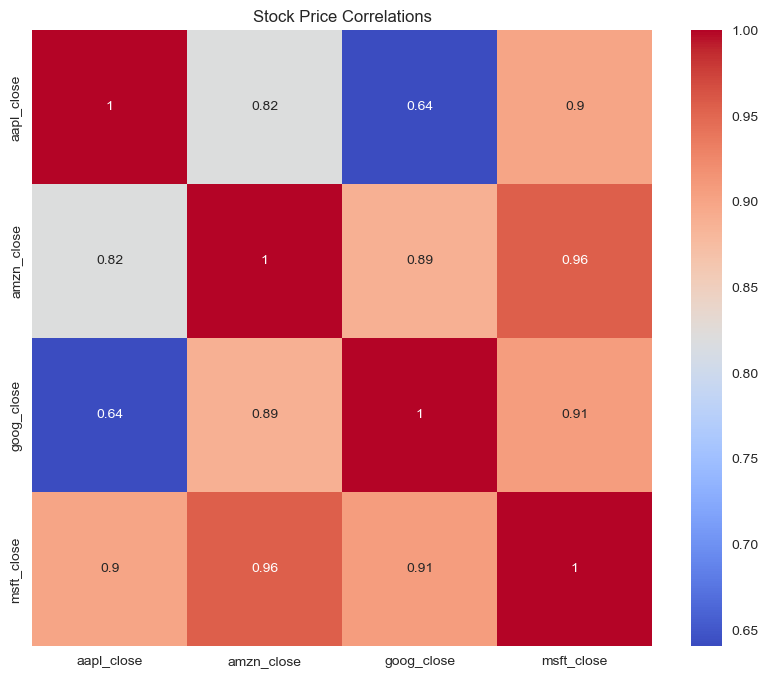


Correlation Matrix:
            aapl_close  amzn_close  goog_close  msft_close
aapl_close    1.000000    0.819078    0.640522    0.899689
amzn_close    0.819078    1.000000    0.888456    0.955977
goog_close    0.640522    0.888456    1.000000    0.907011
msft_close    0.899689    0.955977    0.907011    1.000000


In [46]:
def analyze_correlations():
    try:
        print("Analyzing correlations between stocks...")
        closing_prices = pd.DataFrame()
        
        for company in ['AAPL', 'AMZN', 'GOOG', 'MSFT']:
            df = pd.read_csv(get_stock_file_path(company))
            closing_prices[f'{company.lower()}_close'] = df['close']
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(closing_prices.corr(), annot=True, cmap='coolwarm')
        plt.title('Stock Price Correlations')
        plt.show()
        
        # Display correlation matrix
        print("\nCorrelation Matrix:")
        print(closing_prices.corr())
        
        return closing_prices
    except Exception as e:
        print(f"Error in analyze_correlations: {e}")
        return pd.DataFrame()

# Call the function
correlations = analyze_correlations()

Analyze correlations

Analyzing correlations between stocks...


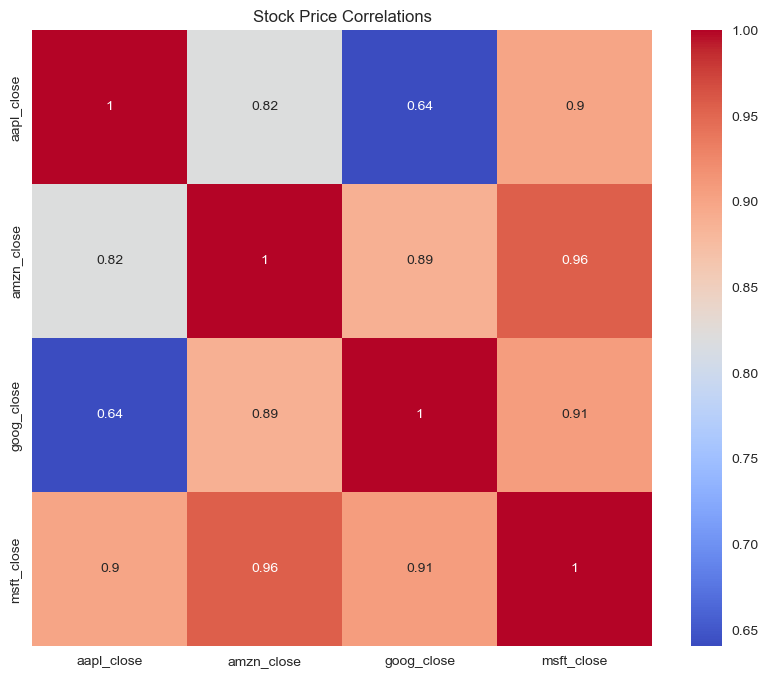


Correlation Matrix:
            aapl_close  amzn_close  goog_close  msft_close
aapl_close    1.000000    0.819078    0.640522    0.899689
amzn_close    0.819078    1.000000    0.888456    0.955977
goog_close    0.640522    0.888456    1.000000    0.907011
msft_close    0.899689    0.955977    0.907011    1.000000


In [47]:
correlations = analyze_correlations()

## 6. Summary and Conclusions

In [48]:
def print_summary(all_data):
    print("Analysis Summary:")
    print("-" * 50)
    print(f"Total number of trading days: {len(all_data)}")
    print(f"Date range: {all_data['date'].min()} to {all_data['date'].max()}")
    print("\nCompanies analyzed:")
    for company in all_data['Name'].unique():
        company_data = all_data[all_data['Name'] == company]
        print(f"\n{company}:")
        print(f"  Average closing price: ${company_data['close'].mean():.2f}")
        print(f"  Highest closing price: ${company_data['close'].max():.2f}")
        print(f"  Lowest closing price: ${company_data['close'].min():.2f}")

In [ ]:
# Print summary

In [49]:
print_summary(all_data)

Analysis Summary:
--------------------------------------------------
Total number of trading days: 4752
Date range: 2013-02-08 00:00:00 to 2018-02-07 00:00:00

Companies analyzed:

AAPL:
  Average closing price: $109.07
  Highest closing price: $179.26
  Lowest closing price: $55.79

AMZN:
  Average closing price: $576.88
  Highest closing price: $1450.89
  Lowest closing price: $248.23

GOOG:
  Average closing price: $725.40
  Highest closing price: $1175.84
  Lowest closing price: $492.55

MSFT:
  Average closing price: $51.06
  Highest closing price: $95.01
  Lowest closing price: $27.37
